<a href="https://colab.research.google.com/github/musicjae/Reinforcement_Learning/blob/master/intro_RL/2_cartpole(dqn_theory).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Mount & Data Load

In [ ]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

FOLDERNAME = 'Colab Notebooks/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))


Mounted at /content/drive


In [1]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn]))) 

Saving r20.png to r20.png
User uploaded file "r20.png" with length 57123 bytes


In [2]:
from IPython.display import Image

# 1. DQN Algorithm. 
  
경험 리플레이를 사용하여, Q 러닝의 Q 함수 업데이트 방법을 사용한다. ( 딥살사와 다르다)

## 1.1 DQN  
  
대략적으로 말하자면, DQN = CNN + Q-learning 으로 간주될 수 있다.  
  
CNN? Refer to https://jysden.tistory.com/51  
  
아래서 소개된 논문에서, DQN은 다음과 같이 정의된다: "We refer to convolutional networks trained with our approach as Deep Q-Networks (DQN)."

## 1.2 왜 DQN이 중요한가?  


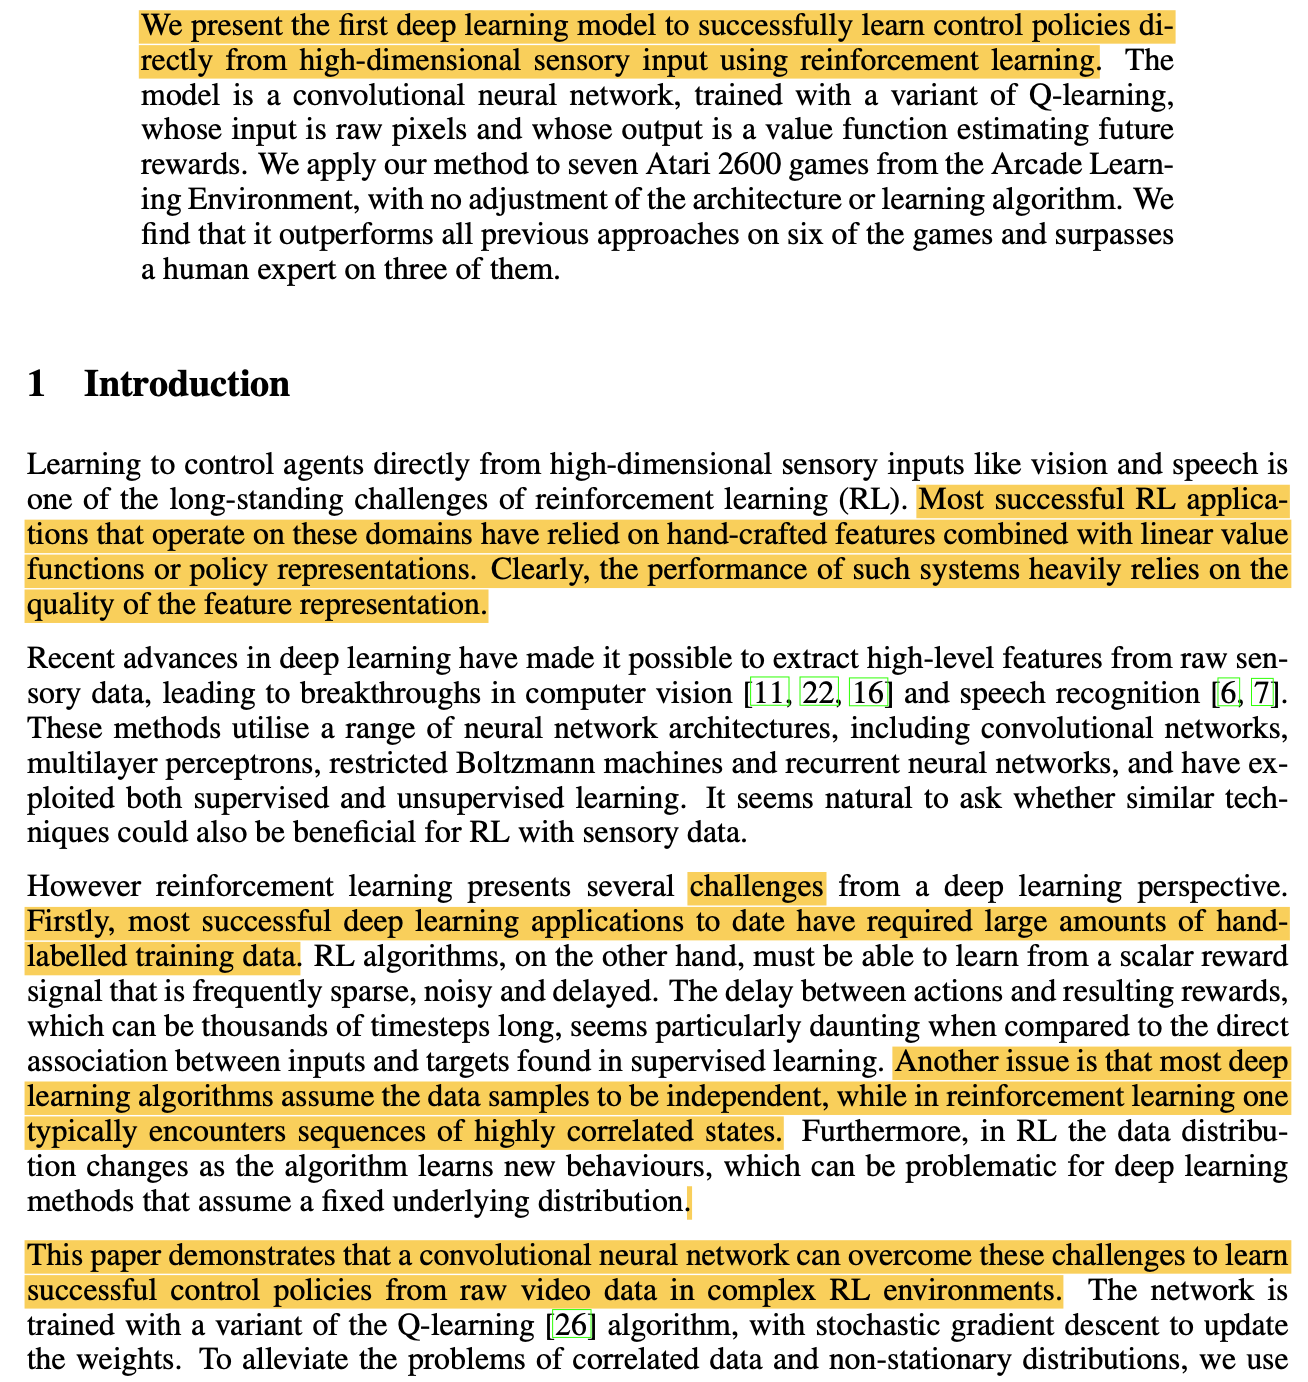

In [ ]:
Image('dqn3.png',width=600)

- **The** **second** **issue**: 다음 state는 현재 state에 의존하여 결정되기 때문에, RL env에서는 states의 상관성이 높다.

#  2. Cartpole introduced in 'AG Barto's paper'  

 - 영상 설명:   
[A video of what is the Cartpole](https://www.youtube.com/watch?v=TdA0APWRCx0)  
  
- 에이전트의 목표: pole이 넘어지지 않도록 cart를 움직이는 것. 여기서는 5 초 동안 pole이 넘이지지 않게 하는 것을 목표로 한다. (1) 폴이 일정 각도 이상으로 떨어지거나, (2) 화면을 벗어나면, episode가 종료.  


## 2.1  에이전트의 상태  
  
에이전트의 상태 = $[x, x', \theta, \theta']$

### 2.1.1  
  
- $x$: cart의 수평선 상의 위치  
- $x'$: 속도  
- $\theta$: pole이 수직선으로부터 기울어진 각도  
- $\theta'$: 각속도  


# 3. DQN Theory introduced in 'Playing Atari with Deep Reinforcement Learning' (2013)

## 3.1 경험 리플레이 The experience Replay  
  
&nbsp;&nbsp;&nbsp;&nbsp; 우리는 Q-러닝과 ANN을 사용하기 위해 Experience Replay를 사용해야 한다.

### 3.1.0 간략한 표준 Q-러닝 복습  
  
- (1) 현재 시간 t에 대하여, $\epsilon$-탐욕 정책에 따라 "$S_t$에 있는 행동 $a_t$"를 선택한다.  
- (2) 보상 r과 다음 상태 $S_{t+1}$을 환경으로부터 받는다.  

- (3) 위 과정에 따라 에이전트가 $S_{t+1}$을 알게 되면, $S_{t+1}$에서 가장 큰 Q함수를 이용하여 $S_{t+1}$에서의 Q함수를 **업데이트**한다.

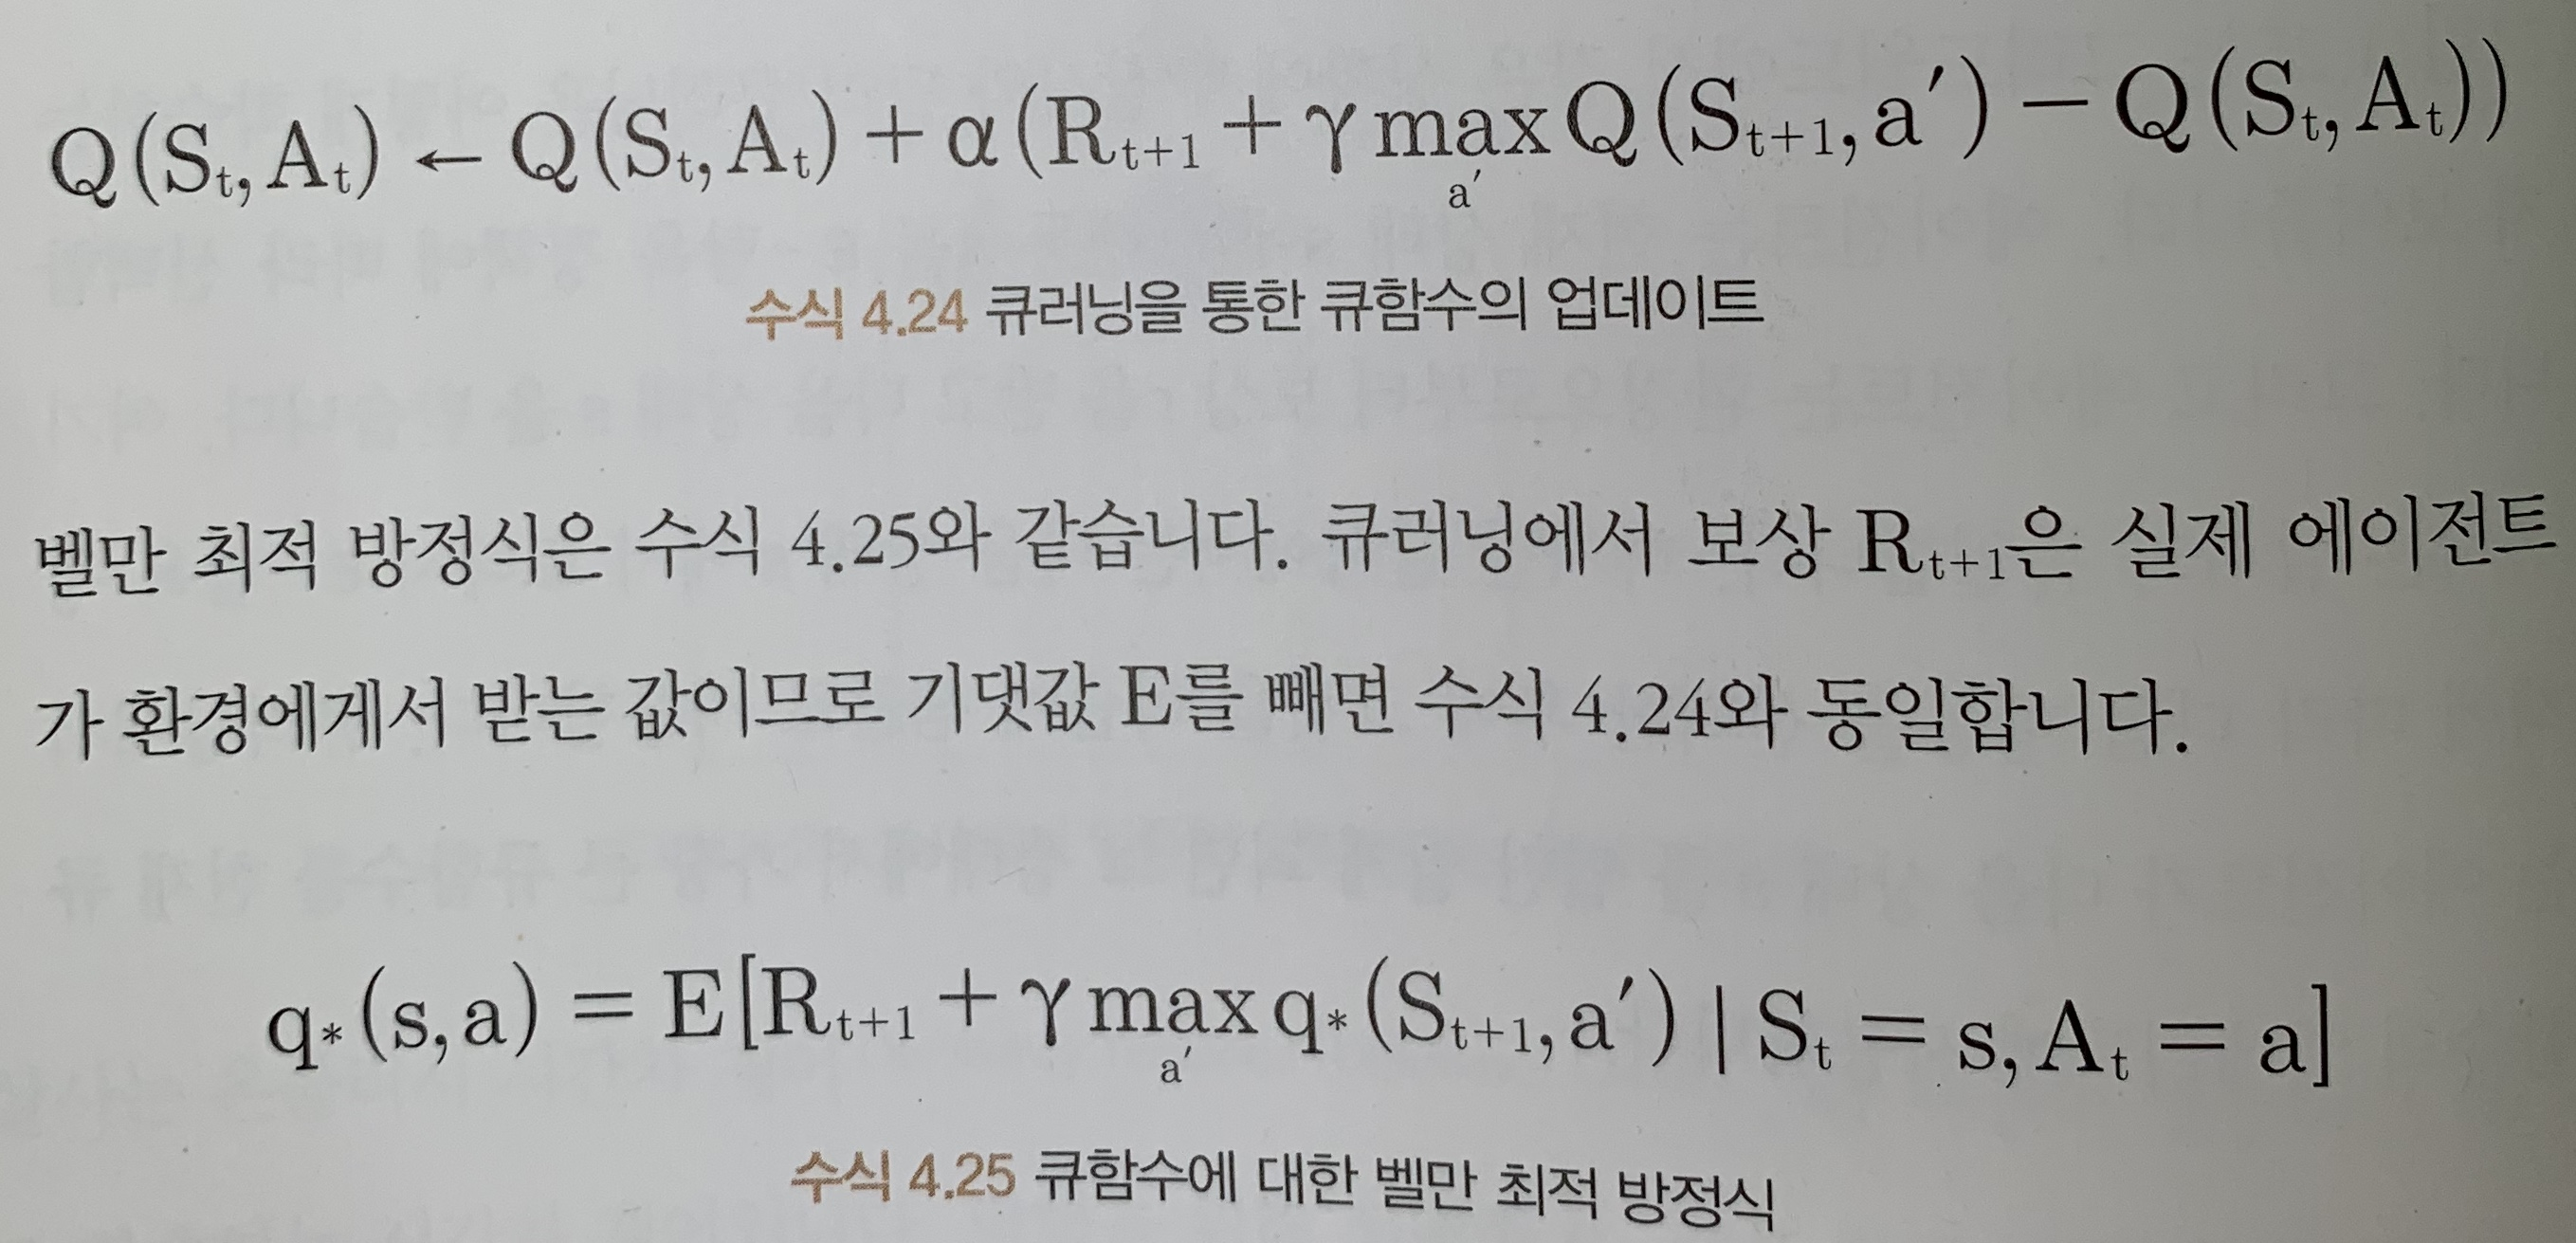

In [ ]:
Image('dqn5.JPG',width=600)

큐러닝 유사코드 https://www.cse.unsw.edu.au/~cs9417ml/RL1/algorithms.html

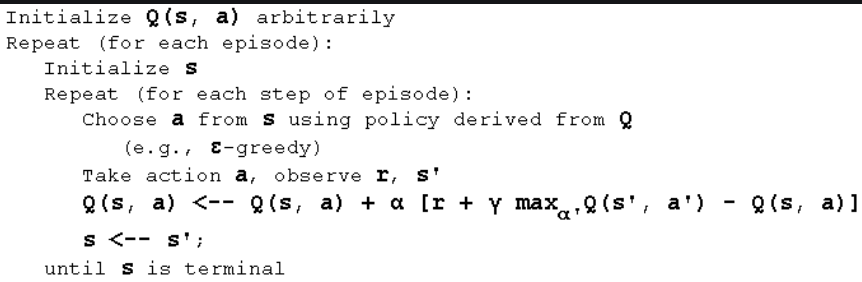

In [ ]:
Image('dqn6.png',width=600)

### 3.1.1 경험 리플레이란?  
  
 - : 에이전트가 환경env에서 explore 하여 얻은 샘플 $(s,a,r,s')$를 memory~(name: Replay Memory)~에 저장하는 것

### 3.1.2 에이전트가 학습하는 방법  
  
- (1) Choose randomly a various of samples in replay memory  
  
- (2) Update ANN for the choosed samples at every timestep  
  
- (3) If the memory was full, then delete it in order from the initial input.  
  
$\to$ 에이전트가 학습을 해서 점점 높은 점수를 받게 되면, **더** **좋은** **샘플들**이 replay memory에 저장된다.



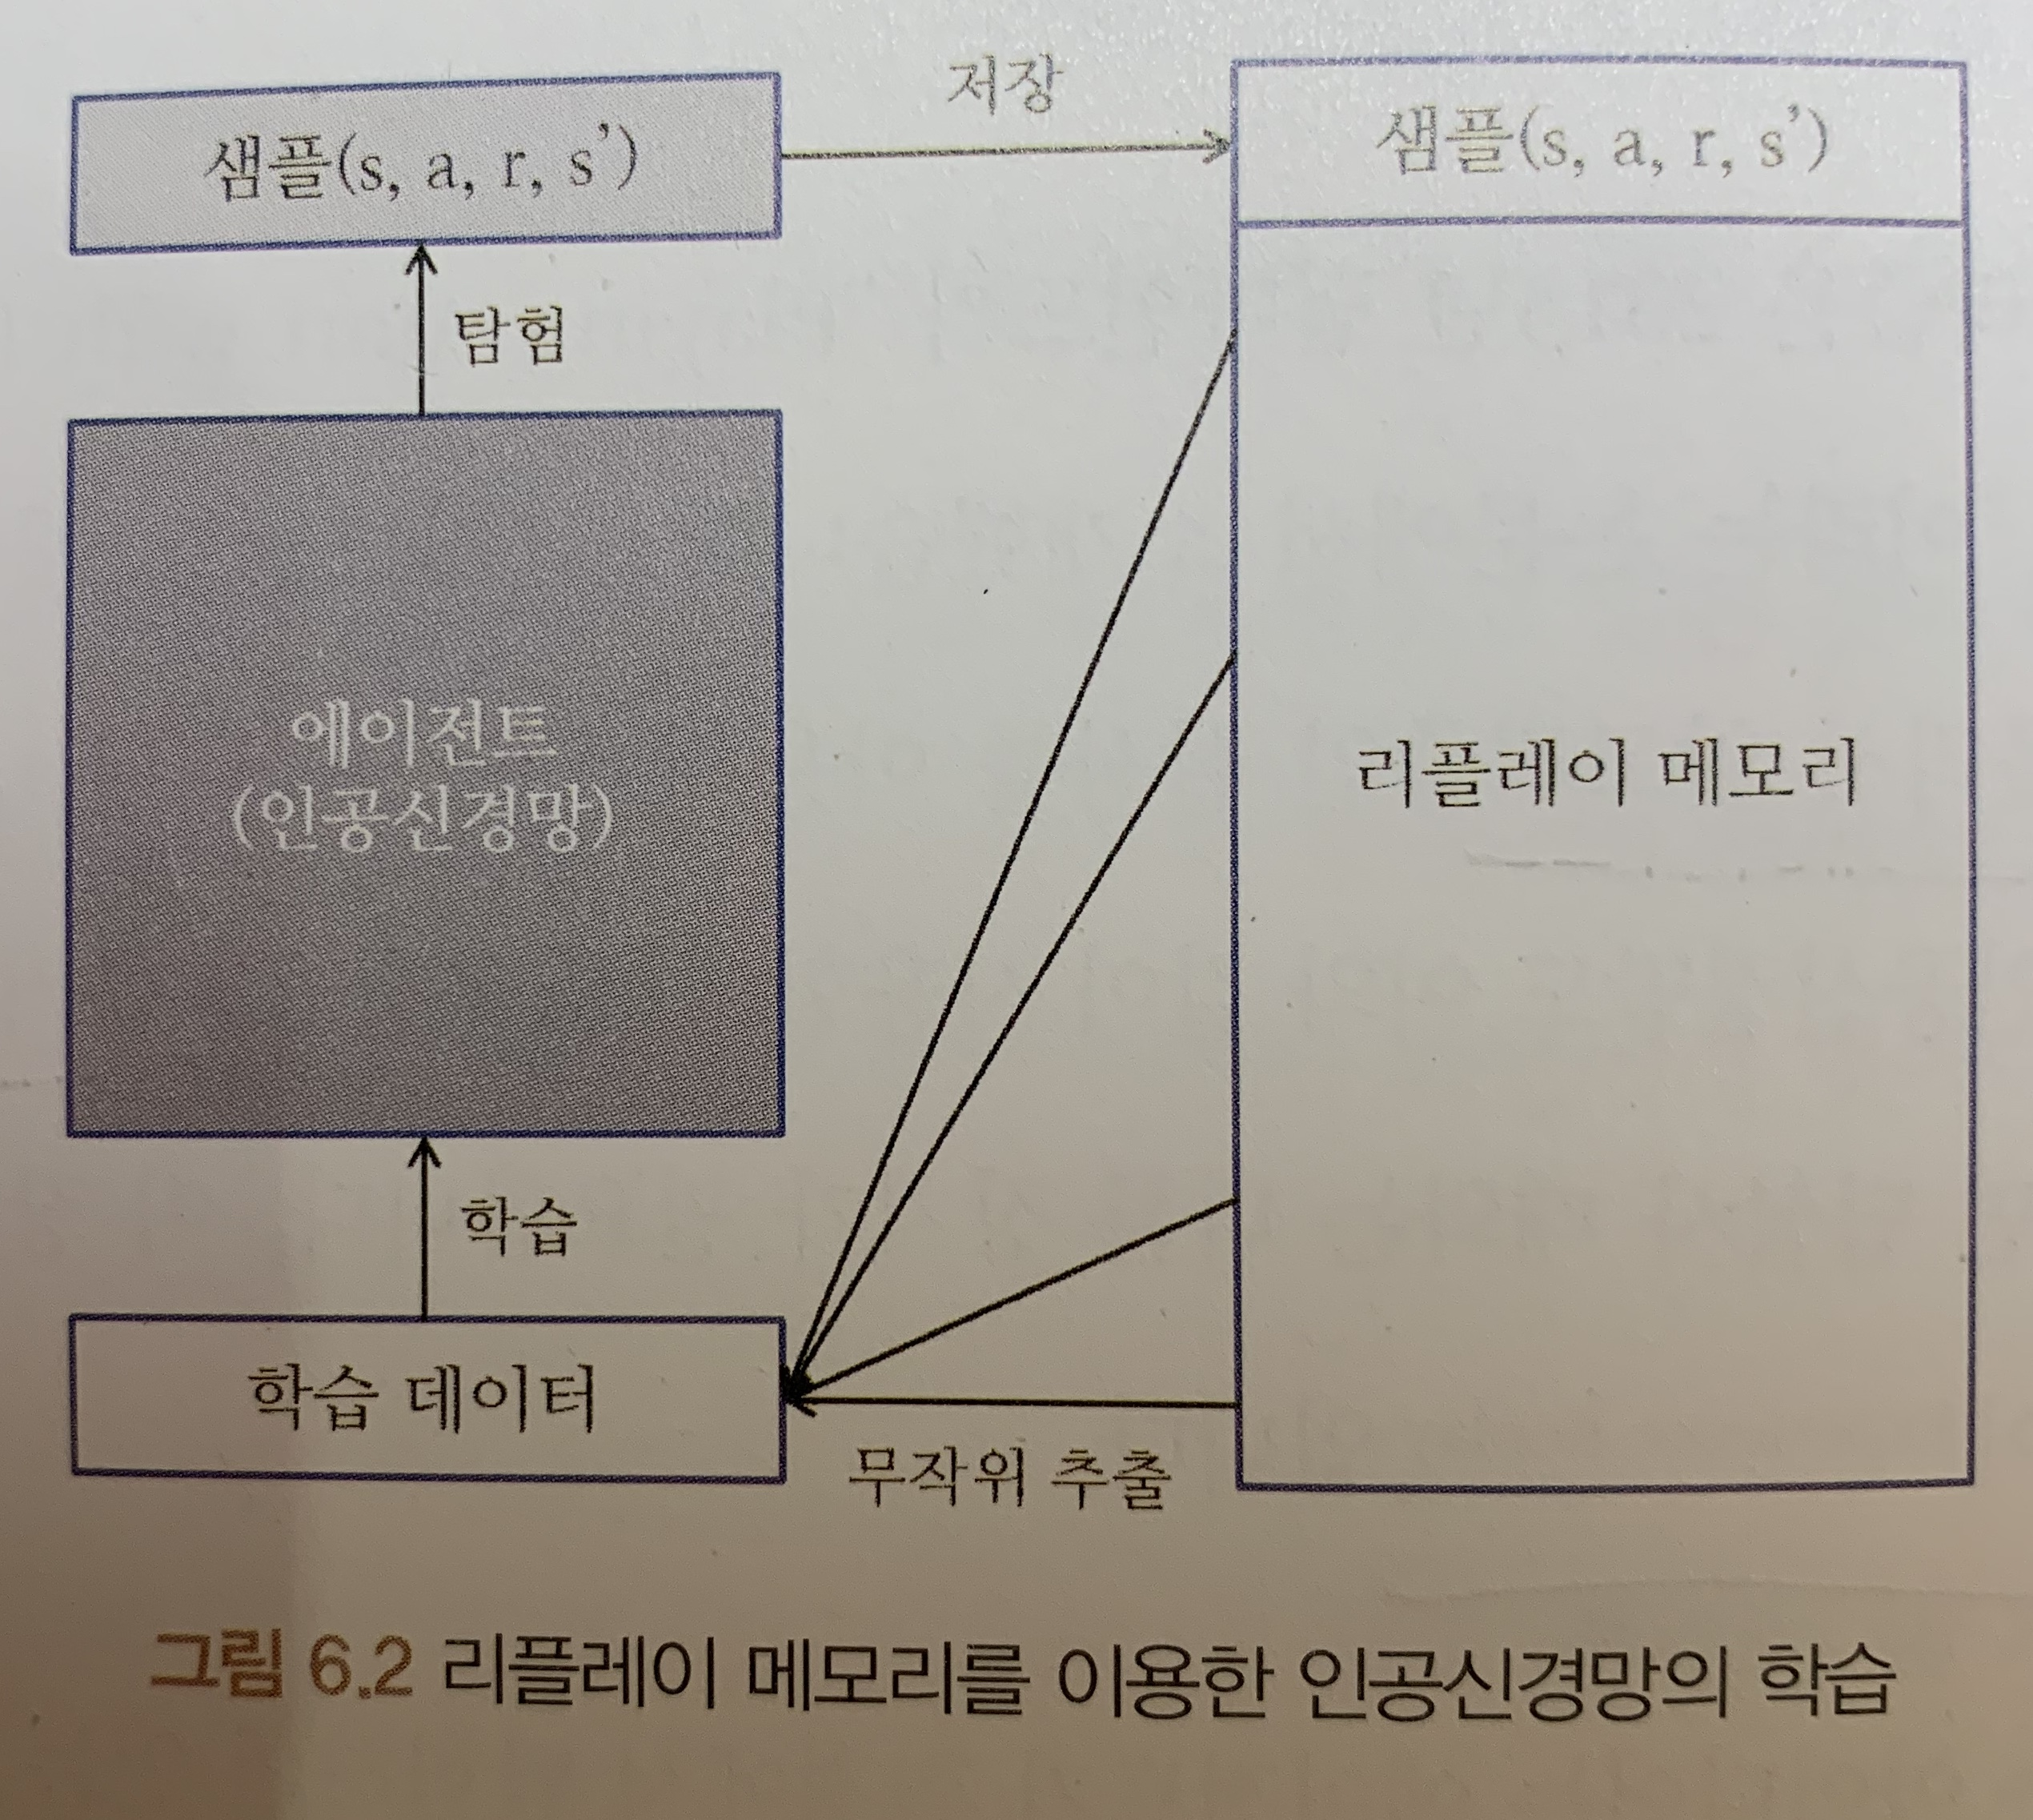

In [ ]:
Image('dqn2.JPG',width=600)

### 3.1.3 경험 리플레이를 이용한 Q-러닝 유사 코드  
  
이것은 표준적인 Q-러닝과 다르다. 

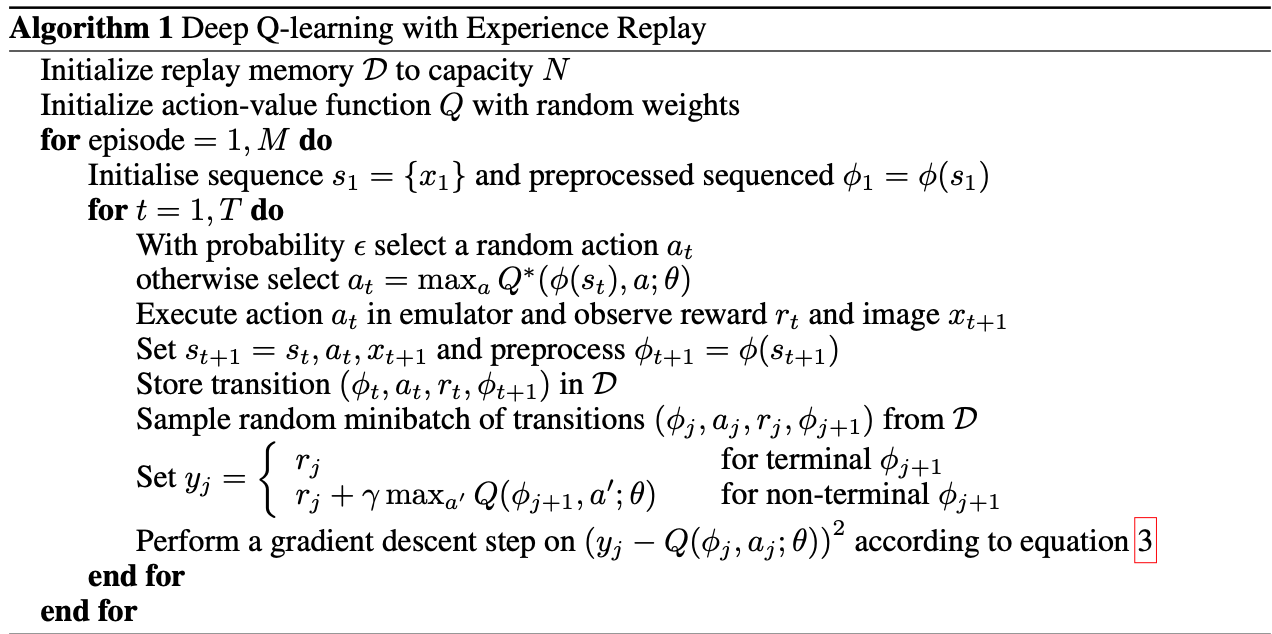

In [ ]:
Image('dqn4.png',width=600)

설명:  
- (1) 매 timestep 마다 에이전트의 경험 ---- 데이터 셋 내의 $D= e_1, ..., e_n$ 중 임의의 하나인 $e_t = (s_t, a_t, r_t, s_{t+1})$ ----을 저장  
- (2) 저장된 경험의 샘플들에 대해 Q-러닝 업데이트 수행  

- (3) 위 과정을 통해 경험 리플레이를 수행한 뒤에, 에이전트는 $\epsilon$-탐욕 정책에 따라 action을 선택하고 수행한다.  

> 위 유사코드에서 기호 $\emptyset$는 a function 이다. 

### 3.1.4 리플레이 메모리의 장점  
  
- (1) 학습에서 사용하는 samples은 서로 temporal correlation이 있지 않다.   
> 이것은 모델이 안 좋은 방향으로만 계속 학습하는 현상을 방지할 수 있다.  
  
- (2) **리플레이 메모리**에서 임의적인 방식으로 추출된 샘플들을 사용하기 때문에, 학습 과정이 안정적이다.  
> 여러 data에서 gradient를 구하는 것이 ANN을 더 안정적으로 만든다.

##3.2 경험 리플레이의 특징  
  

### 3.2.1 Off - Policy 에 적합  
  
[경험 리플레이]는 ---- **지금** **에이전트가** **경험하고** **있는** **상황** (현재 정책으로부터 발생한 상황) ---- 이 아닌, **다양한** **과거의** **상황**  (이전 정책으보퉈 발생한 상황)으로부터 학습한다. 따라서, off-policy 알고리즘이 적합하다.

##### 3.2.1.1 Review [ on-policy vs off-policy]
  
  

**On-policy** : 학습하는 policy와 행동하는 policy가 반드시 같아야만 학습이 가능한 강화학습 알고리즘.

ex) Sarsa

on-policy의 경우 1번이라도 학습을 해서 policy improvement를 시킨 순간, 그 policy가 했던 과거의 experience들은 모두 사용이 불가능하다. 즉 매우 데이터 효율성이 떨어진다. 한 번 exploration해서 얻은 experience를 학습하고나면 그냥은 재사용이 불가능하다.(Importance sampling등을 해야 재사용가능 함.)





**Off-policy** : 학습하는 policy와 행동하는 policy가 반드시 같지 않아도 학습이 가능한 알고리즘.

ex) Q-learning

off-policy는 현재 학습하는 policy가 과거에 했던 experience도 학습에 사용이 가능하고, 심지어는 해당 policy가 아니라 예를 들어 사람이 한 데이터로부터도 학습을 시킬 수가 있다.
  

** 발췌: https://newsight.tistory.com/250

## 3.2.2 DQN은 타깃 신경망을 사용한다  


#### 3.2.2.1 MSE
  
 **MSE** $= (grounded\ \ truth - the\ \ predicted)^2$  
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$= [(R_{t+1} + \gamma max_{a'}\  Q(s', a', \theta)) - Q(s,a,\theta)]^2\ \ \ \ where\ \ s',\ \  a'\ \ are\ \ next\ \ state,\ \  action$
          

         
> MSE가 최소가 되는 방향으로 ANN이 업데이트된다.  



##### 3.2.2.2 부트스트랩으로 인해 마주치는 곤경을 피하기  

[Review]  

 
- 부트스트랩 (Bootstrap) : 다른 State의 가치함수 예측값을 통해 지금 State의 가치함수를 예측하는 방식  
  
DQN 경우에, 부트스트랩 방식으로 인해 업데이트 목표인 **정답**이 계속 변할 수 있다. 설상가상으로, "정답을 만들어내는 ANN" 자체도 계속 업데이트 되면, 이 곤경은 더욱 심화될 것.
  
[Resolution]  
  
- (1) 정답을 만들어내는 ANN을 일정 시간동안 유지해준다  
- (2) 타깃 신경망(TNN)을 따로 만든 뒤, 그 TNN에서 정답에 해당하는 값을 구한다  
- (3) (2)에서 구한 정답으로 다른 ANN을 학습시킨다. TNN은 일정 timestep 마다 그 ANN을 업데이트시킨다.

#### 3.2.2.3 The Final MSE  
타깃 네트워크를 이용한 DQN의 오류함수 정의  
  

- MSE = (정답 - 예측)$^2$ = $(R_{t+1} + \gamma\ max_{a'}\ Q(S_{t+1},\ a',\ ,\theta^-) - Q(S_t,\ A_t\ ,\theta))^2$  


## 3.3 Applications

### 3.3.1 Code Analyses in detail



메인 part에서는, 먼저 gym에서 객체로 선언한 env로부터 상태, 행동의 정보를 가져온다. 그 뒤에, DQN 에이전트 객체를 생성한다.

In [ ]:
if __name__ == "__main__":
    # CartPole-v1 환경, 최대 타임스텝 수가 500
    env = gym.make('CartPole-v1') # 환경을 객체로 선언
    state_size = env.observation_space.shape[0] # 위에서 객체로 선언된 환경으로부터 **현재 상태(관측) 공간** 불러오기
    action_size = env.action_space.n # 행동 공간 불러오기

    # DQN 에이전트 생성
    agent = DQNAgent(state_size, action_size)

위에서 사용된 DQNagent 클래스는 어떻게 구성되는가? 즉, 어떻게 에이전트와 환경이 상호작용하는가? 그 절차는 아래와 같다:

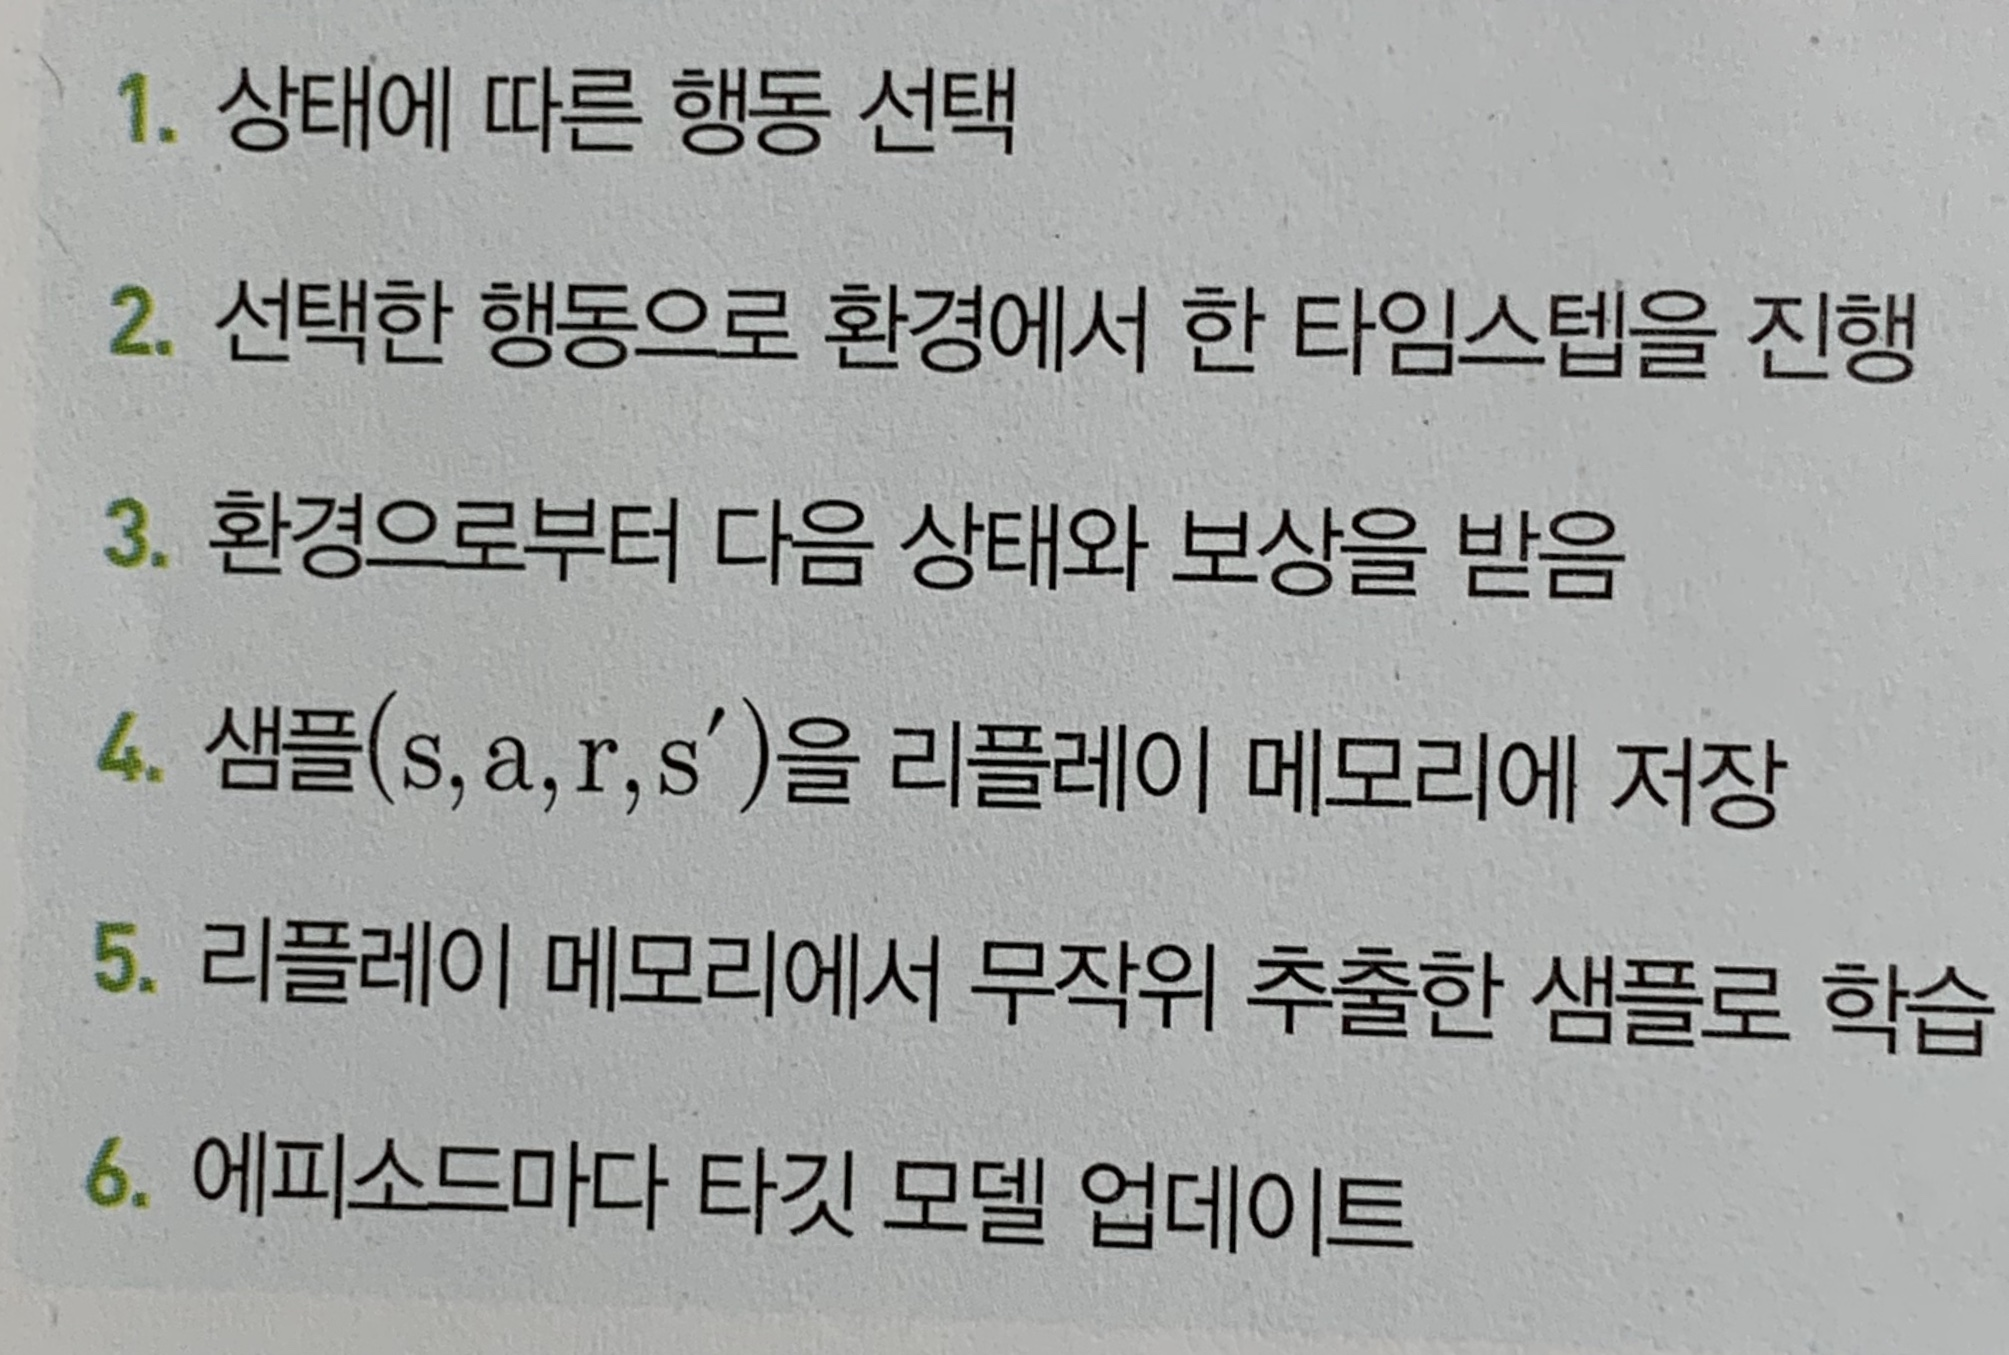

In [ ]:
Image('dqn7.JPG',width=400)

위 절차를 수행하기 이전에 init 함수부터 알아보자.

- 전술했듯이, DQN의 특징 중 하나는 **타깃신경망**을 사용한다는 것이다. 따라서 우리는 아래 초기화 함수에서 타깃 모델을 생성한다. 즉, DQN 클래스를 두번 호출해서, "모델"과 "타깃모델"을 따로 만들어준다. (# 모델과 타깃 모델 생성 참고) 

In [ ]:
        # 모델과 타깃 모델 생성
        self.model = self.build_model()
        self.target_model = self.build_model()

- 학습 시작 전에, 위의 두 모델들의 값을 통일시켜야 한다. (# 타깃 모델 초기화 참고) 

In [ ]:
# 타깃 모델 초기화
        self.update_target_model()

        if self.load_model:
            self.model.load_weights("drive/My Drive/Colab Noteboolks/rl/rl_intro/dqn(cartpole)/cartpole_dqn_trained.h5")

- 이것은 model로부터 가중치 값을 가져와서 target_model의 가중치 값으로 설정해준다.

In [ ]:
def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

- 행동 함수:  
  
이제 행동 함수를 보자. 이것은 $\epsilon$-탐욕 정책에 따라 행동을 선택한다. 초기 $\epsilon$값은 1이다. 에이전트는 이때 무작위로 행동을 선택한다. 매 타임스텝마다 $\epsilon$은 train_model 함수의 수행에 의해 감소된다.

In [ ]:
# 입실론 탐욕 정책으로 행동 선택
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            q_value = self.model.predict(state)
            return np.argmax(q_value[0])


위 행동 함수를 1 번 수행 시, 에이전트는 하나의 샘플을 얻게 된다.

- 메모리 사용  
  
DQN은 리플레이 메모리를 사용하니까 에이전트는 samples를 메모리에 저장해야 한다. deque를 사용하여 일정 크기를 가지는 메모리를 생성한다.

In [ ]:
 # 리플레이 메모리, 최대 크기 2000
        self.memory = deque(maxlen=2000)

아래 코드를 통해, 매 수행마다 샘플들을 memory에 저장한다.

In [ ]:
 # 샘플 <s, a, r, s'>을 리플레이 메모리에 저장
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))


- 학습 함수:  
  
이것은 무작위로 미니 배치를 뽑아서 에이전트를 학습시킨다. 아래 같이 if 조건문이 사용된 까닭은 샘플링이 무작위로 수행되기 위해서는 메모리 크기가 일정 수치 이상이어야 하기 때문이다.

In [ ]:
 # 매 타임스텝마다 학습
            if len(agent.memory) >= agent.train_start:
                agent.train_model()

- 학습 함수 자세히 알아보기

- (1) 미니 배치를 무작위로 샘플링하기   
- (2) 각 변수들을 리스트로 묶어서 저장하기

In [ ]:
# 메모리에서 배치 크기만큼 무작위로 샘플 추출
        mini_batch = random.sample(self.memory, self.batch_size)

        states = np.zeros((self.batch_size, self.state_size))
        next_states = np.zeros((self.batch_size, self.state_size))
        actions, rewards, dones = [], [], []

        for i in range(self.batch_size):
            states[i] = mini_batch[i][0]
            actions.append(mini_batch[i][1])
            rewards.append(mini_batch[i][2])
            next_states[i] = mini_batch[i][3]
            dones.append(mini_batch[i][4])

Use the Deep Q-learning

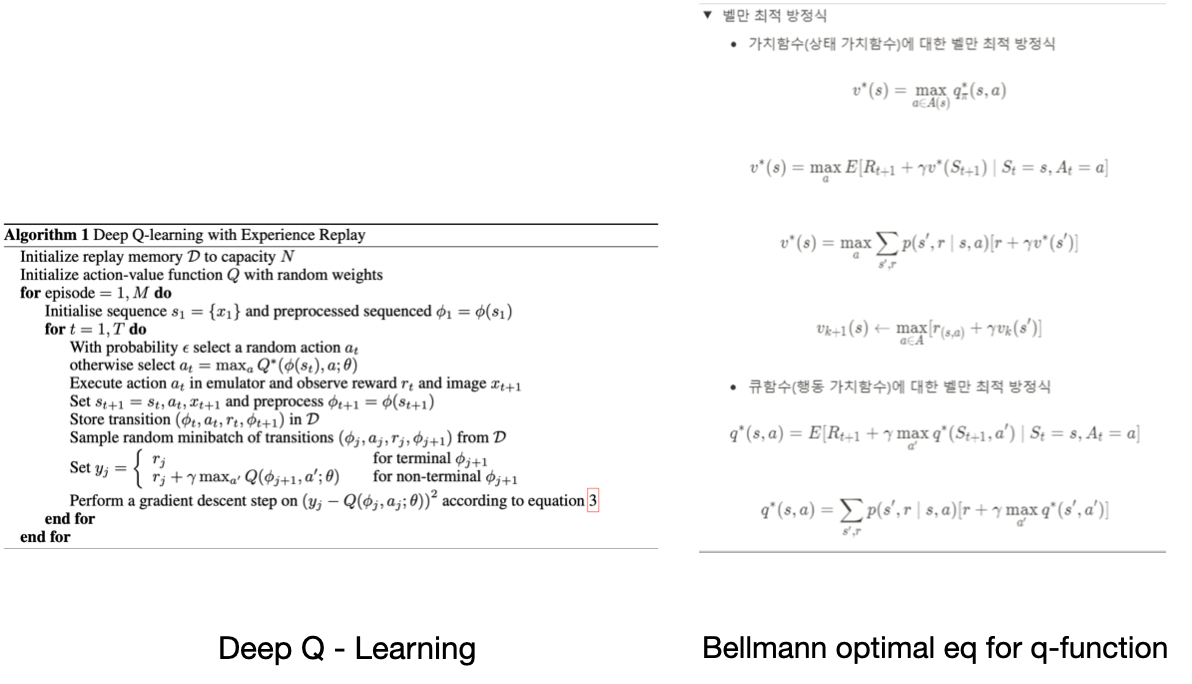

In [ ]:
Image('dqn9.png',width=600)

벨만 최적화 방정식을 이용하여 타겟 업데이트하기

In [ ]:
        
        # 현재 상태에 대한 모델의 큐함수
        target = self.model.predict(states)

        # 다음 상태에 대한 타깃 모델의 큐함수
        target_val = self.target_model.predict(next_states)

        # 벨만 최적 방정식을 이용한 업데이트 타깃
        for i in range(self.batch_size):
            if dones[i]:
                target[i][actions[i]] = rewards[i] # 현재 상태의 모델 Q함수인 target을 업데이트.
            else:
                target[i][actions[i]] = rewards[i] + self.discount_factor * (
                    np.amax(target_val[i]))

- Entire train def

In [ ]:
# 학습 파라메터
        model_params = self.model.trainable_variables
        with tf.GradientTape() as tape:
            # 현재 상태에 대한 모델의 큐함수
            predicts = self.model(states)
            one_hot_action = tf.one_hot(actions, self.action_size)
            predicts = tf.reduce_sum(one_hot_action * predicts, axis=1)

            # 다음 상태에 대한 타깃 모델의 큐함수
            target_predicts = self.target_model(next_states)
            target_predicts = tf.stop_gradient(target_predicts)

            # 벨만 최적 방정식을 이용한 업데이트 타깃
            max_q = np.amax(target_predicts, axis=-1)
            targets = rewards + (1 - dones) * self.discount_factor * max_q
            loss = tf.reduce_mean(tf.square(targets - predicts))

### 3.3.2 train.py 결과

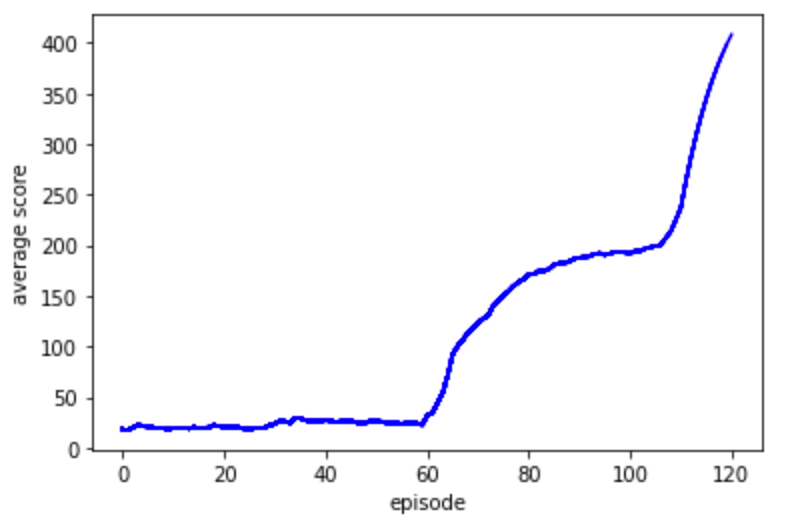

In [3]:
Image('r20.png')

# References  
  
[1] 파이썬과 케라스로 배우는 강화학습  
[2] Playing Atari with Deep Reinforcement Learning (2013)  
[3] https://www.cse.unsw.edu.au/~cs9417ml/RL1/algorithms.html  
[4] RL_Study_Pkrl_Online_1 4강 발제문